In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [4]:
# Step 1: Generate Synthetic Sensor Data
np.random.seed(42)

# Normal data: Gaussian distribution (mean=0, std=1)
normal_data = np.random.normal(0, 1, (1000, 10))

# Anomalous data: Uniform distribution
anomalous_data = np.random.uniform(-5, 5, (200, 10))

# Combine and label
X = np.vstack([normal_data, anomalous_data])
y = np.hstack([np.zeros(1000), np.ones(200)])  # 0 = normal, 1 = anomaly

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 2: Build the Autoencoder Model
input_dim = X_train.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(6, activation='relu')(input_layer)
encoded = Dense(3, activation='relu')(encoded)

# Decoder
decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [8]:
# Step 3: Train the Autoencoder
autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.5966 - val_loss: 2.7078
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6392 - val_loss: 2.6946
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.5526 - val_loss: 2.6796
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6412 - val_loss: 2.6623
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5606 - val_loss: 2.6423
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5907 - val_loss: 2.6199
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4740 - val_loss: 2.5951
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4053 - val_loss: 2.5697
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3867 - val_loss: 2.5454
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3853 - val_loss: 2.5218
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2623 - val_loss: 2.4994
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4155 - val_

In [9]:
# Step 4: Evaluate Reconstruction Error
# Predict reconstruction for test data
X_test_pred = autoencoder.predict(X_test)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(X_test - X_test_pred), axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [12]:
# Step 5: Set Anomaly Threshold
threshold = np.percentile(reconstruction_errors[y_test == 0], 95)  # 95th percentile of normal data errors

In [14]:
# Step 6: Identify Anomalies
anomalies = reconstruction_errors > threshold

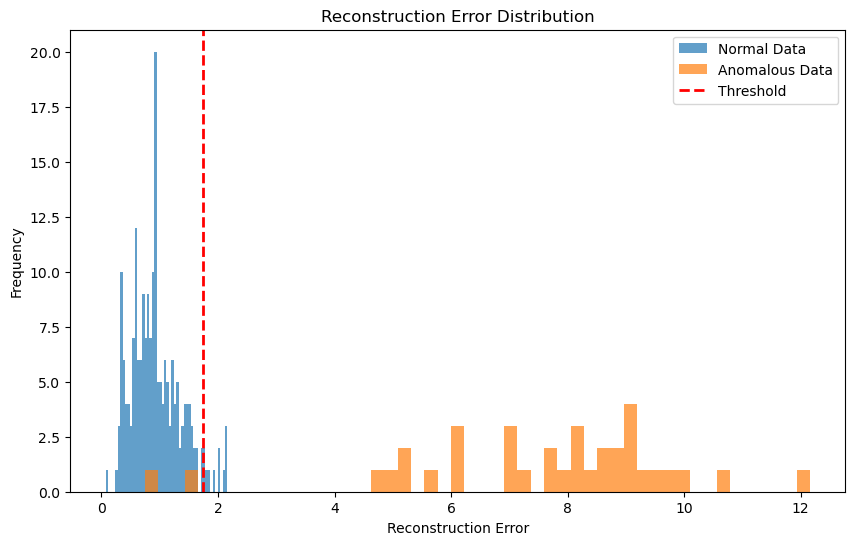

In [16]:
# Step 7: Visualize Results
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors[y_test == 0], bins=50, alpha=0.7, label="Normal Data")
plt.hist(reconstruction_errors[y_test == 1], bins=50, alpha=0.7, label="Anomalous Data")
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Threshold")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [18]:
# Step 8: Report Results
accuracy = np.mean(anomalies == y_test)
print(f"Anomaly Detection Accuracy: {accuracy * 100:.2f}%")

Anomaly Detection Accuracy: 94.58%
